In [6]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
mnist = fetch_openml('mnist_784')
print(mnist.DESCR)

mnist.keys()

D:\Android\myanaconda\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


KeyboardInterrupt: 

## 1. Memeriksa Data Imbalance

In [ ]:
# Membuat DataFrame dari dataset
mnist_df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
mnist_df = pd.concat([mnist_df, pd.Series(mnist.target, name='target')], axis=1)

# Memeriksa jumlah data setiap label
label_counts = mnist_df['target'].value_counts().sort_index()
print("Jumlah data setiap label:")
print(label_counts)

## 2. Menampilkan 15 Citra Pertama dari MNIST

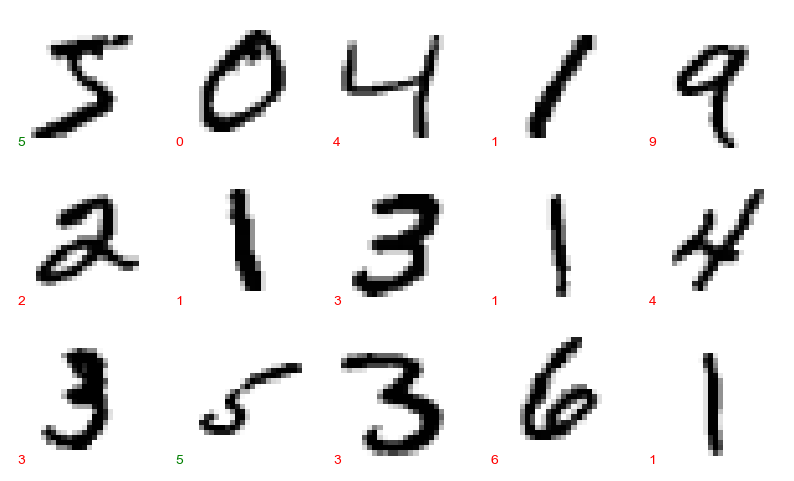

In [8]:
# Mengambil 15 citra pertama dan labelnya
images = mnist.data[:15].values.astype(float)
labels = mnist.target[:15].values.astype(int)

# Normalisasi nilai piksel
images /= 255.0

# Menampilkan 15 citra pertama berserta labelnya
fig, axes = plt.subplots(3, 5, figsize=(10, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].reshape(28, 28), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(labels[i]), transform=ax.transAxes, color='green' if labels[i] == labels[0] else 'red')

plt.show()

## 3. Ekstrasi Fitur

In [9]:
X = mnist_df.drop('target', axis=1)
y = mnist_df['target']

# Menentukan jumlah komponen utama (principal components) yang ingin dipertahankan
n_components = 50

# Menerapkan PCA pada data citra
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X)

## 4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [10]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size=0.1, random_state=42)

## 5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.

In [13]:
# --- menggunakan algortima Naive Bayes

# Klasifikasi dengan Naive Bayes pada rasio 70:30
nb_model_70 = MultinomialNB()
nb_model_70.fit(X_train_70, y_train_70)
accuracy_nb_70 = nb_model_70.score(X_test_70, y_test_70)
print(f"Akurasi Naive Bayes (70:30): {accuracy_nb_70:.2f}")

# Klasifikasi dengan Naive Bayes pada rasio 80:20
nb_model_80 = MultinomialNB()
nb_model_80.fit(X_train_80, y_train_80)
accuracy_nb_80 = nb_model_80.score(X_test_80, y_test_80)
print(f"Akurasi Naive Bayes (80:20): {accuracy_nb_80:.2f}")

# Klasifikasi dengan Naive Bayes pada rasio 90:10
nb_model_90 = MultinomialNB()
nb_model_90.fit(X_train_90, y_train_90)
accuracy_nb_90 = nb_model_90.score(X_test_90, y_test_90)
print(f"Akurasi Naive Bayes (90:10): {accuracy_nb_90:.2f}")

Akurasi Naive Bayes (70:30): 0.83
Akurasi Naive Bayes (80:20): 0.83
Akurasi Naive Bayes (90:10): 0.83


In [14]:
# Klasifikasi dengan SVM pada rasio 70:30
svm_model_70 = SVC()
svm_model_70.fit(X_train_70, y_train_70)
accuracy_svm_70 = svm_model_70.score(X_test_70, y_test_70)
print(f"Akurasi SVM (70:30): {accuracy_svm_70:.2f}")

# Klasifikasi dengan SVM pada rasio 80:20
svm_model_80 = SVC()
svm_model_80.fit(X_train_80, y_train_80)
accuracy_svm_80 = svm_model_80.score(X_test_80, y_test_80)
print(f"Akurasi SVM (80:20): {accuracy_svm_80:.2f}")

# Klasifikasi dengan SVM pada rasio 90:10
svm_model_90 = SVC()
svm_model_90.fit(X_train_90, y_train_90)
accuracy_svm_90 = svm_model_90.score(X_test_90, y_test_90)
print(f"Akurasi SVM (90:10): {accuracy_svm_90:.2f}")

Akurasi SVM (70:30): 0.98
Akurasi SVM (80:20): 0.98
Akurasi SVM (90:10): 0.97


## 6. Evaluasi model yang Anda buat terhadap data training dan data testing.

In [15]:
# Evaluasi model Naive Bayes pada data training (rasio 70:30)
y_train_pred_nb_70 = nb_model_70.predict(X_train_70)
train_accuracy_nb_70 = accuracy_score(y_train_70, y_train_pred_nb_70)
print(f"Akurasi Data Training (Naive Bayes 70:30): {train_accuracy_nb_70:.2f}")

# Evaluasi model Naive Bayes pada data testing (rasio 70:30)
y_test_pred_nb_70 = nb_model_70.predict(X_test_70)
test_accuracy_nb_70 = accuracy_score(y_test_70, y_test_pred_nb_70)
print(f"Akurasi Data Testing (Naive Bayes 70:30): {test_accuracy_nb_70:.2f}")

# Classification report Naive Bayes
print("Classification Report (Naive Bayes - Data Testing 70:30):")
print(classification_report(y_test_70, y_test_pred_nb_70))

# Confusion matrix Naive Bayes
print("Confusion Matrix (Naive Bayes - Data Testing 70:30):")
print(confusion_matrix(y_test_70, y_test_pred_nb_70))

Akurasi Data Training (Naive Bayes 70:30): 0.83
Akurasi Data Testing (Naive Bayes 70:30): 0.83
Classification Report (Naive Bayes - Data Testing 70:30):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2058
           1       0.88      0.94      0.91      2364
           2       0.88      0.83      0.85      2133
           3       0.79      0.81      0.80      2176
           4       0.83      0.74      0.78      1936
           5       0.85      0.66      0.75      1915
           6       0.87      0.92      0.89      2088
           7       0.94      0.83      0.88      2248
           8       0.65      0.77      0.70      1992
           9       0.69      0.83      0.76      2090

    accuracy                           0.83     21000
   macro avg       0.83      0.82      0.82     21000
weighted avg       0.83      0.83      0.83     21000

Confusion Matrix (Naive Bayes - Data Testing 70:30):
[[1857    1   12    6    4   33   4

In [16]:
# Evaluasi model SVM pada data training (rasio 70:30)
y_train_pred_svm_70 = svm_model_70.predict(X_train_70)
train_accuracy_svm_70 = accuracy_score(y_train_70, y_train_pred_svm_70)
print(f"Akurasi Data Training (SVM 70:30): {train_accuracy_svm_70:.2f}")

# Evaluasi model SVM pada data testing (rasio 70:30)
y_test_pred_svm_70 = svm_model_70.predict(X_test_70)
test_accuracy_svm_70 = accuracy_score(y_test_70, y_test_pred_svm_70)
print(f"Akurasi Data Testing (SVM 70:30): {test_accuracy_svm_70:.2f}")

# Classification report SVM
print("Classification Report (SVM - Data Testing 70:30):")
print(classification_report(y_test_70, y_test_pred_svm_70))

# Confusion matrix SVM
print("Confusion Matrix (SVM - Data Testing 70:30):")
print(confusion_matrix(y_test_70, y_test_pred_svm_70))

Akurasi Data Training (SVM 70:30): 0.99
Akurasi Data Testing (SVM 70:30): 0.98
Classification Report (SVM - Data Testing 70:30):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.98      0.99      0.99      2364
           2       0.97      0.98      0.97      2133
           3       0.97      0.97      0.97      2176
           4       0.97      0.98      0.97      1936
           5       0.98      0.97      0.97      1915
           6       0.98      0.99      0.99      2088
           7       0.97      0.97      0.97      2248
           8       0.98      0.96      0.97      1992
           9       0.97      0.96      0.97      2090

    accuracy                           0.98     21000
   macro avg       0.98      0.98      0.98     21000
weighted avg       0.98      0.98      0.98     21000

Confusion Matrix (SVM - Data Testing 70:30):
[[2035    1    3    0    1    4    8    2    4    0]
 [   0 2344   

## 7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

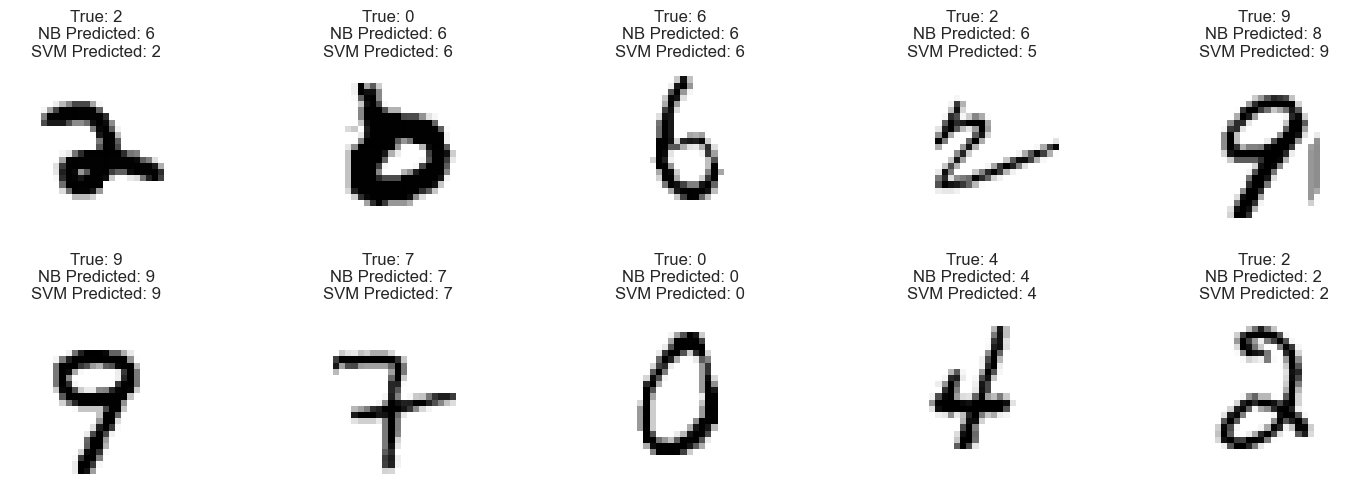

In [17]:
# Memilih beberapa sampel secara acak untuk divisualisasikan
random_indices = random.sample(range(len(y_test_70)), 10)

plt.figure(figsize=(15, 5))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(X_test_70.iloc[index].values.reshape(28, 28), cmap='binary')
    plt.title(f"True: {y_test_70.iloc[index]}\nNB Predicted: {y_test_pred_nb_70[index]}\nSVM Predicted: {y_test_pred_svm_70[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

### Model terbaik menggunakan model SVM yang mana hasil dari metode tersebut adalah 0.98 yang hampir mendekati 1 (optimal) akan tetapi kekurangannya adalah waktu yang dibutuhkan untuk mengeksekusi programnnya jauh lebih lama